# Gradient Ascent in a Simple Landscape

This is optional coursework from the class in Mathematics and Computation Methods for Complex Systems (MCMCS) at the University of Sussex.

Parts of the code is built by Professor Luc Berthouze with gaps in the code that is filled by the student (me, Joakim Torsvik)

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random

Starting point at iteration 0: [x: -2, y: -4, z: -2]
New point at iteration 0: [x: -1.0, y: -2.0, z: -1.0]
New point at iteration 1: [x: 0.0, y: 1.0, z: 0.0]
New point at iteration 2: [x: 0.0, y: 2.0, z: 1.0]
New point at iteration 3: [x: 0.0, y: 3.0, z: 2.0]
New point at iteration 4: [x: 0.0, y: 4.0, z: 2.0]


C:\Users\JOAKIM~1\AppData\Local\Temp/ipykernel_18000/1024202074.py:37: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


(True, 4)

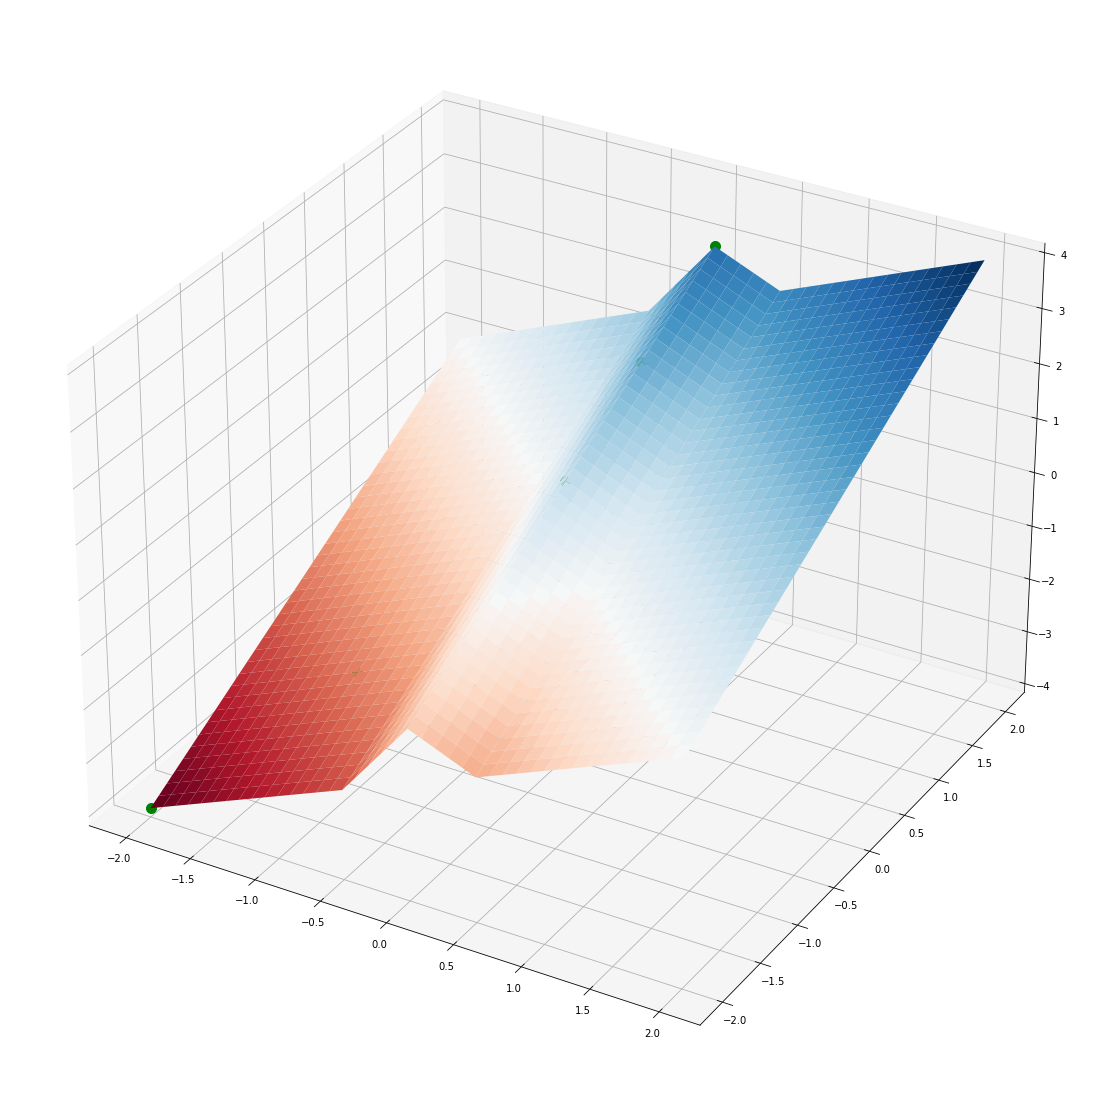

In [2]:
# Definition of a Simple landscape
def SimpleLandscape(x, y):
    return np.where(1-np.abs(2*x) > 0, 1-np.abs(2*x) + x+y, x + y)
    
# Definition of the gradient of the Simple landscape
def SimpleLandscapeGrad(x, y):
    
    """This function should return the gradient of the landscape at point x,y"""
    
    # TO DO: Initialise a vector g containing the gradient
    
    g = np.zeros(2)
    
    # TO DO: Keeping into account the definition of the function, calculate the value of g. 
    # There are 3 scenarios on the value of x to consider (use if, elif, else instructions)
    # If you cannot figure it out from the specification of the function itself, plot it!
    
    if 1 - np.abs(2 * x) > 0:
        if x < 0:
            g[0] = 1
        elif x == 0:
            g[0] == 0
        else:
            g[0] = -1
    else:
        g[0] = 1
    g[1] = 1
    
    return g

# Function to draw a surface (equivalent to ezmesh in Matlab)
# See argument cmap of plot_surface instruction to adjust color map (if so desired)
def DrawSurface(fig, varxrange, varyrange, function):
    
    """Function to draw a surface given x,y ranges and a function."""
    
    ax = fig.gca(projection='3d')
    xx, yy = np.meshgrid(varxrange, varyrange, sparse=False)
    z = function(xx, yy)
    
    ax.plot_surface(xx, yy, z, cmap='RdBu') # color map can be adjusted, or removed! 
    fig.canvas.draw()
    
    return ax



# Function implementing gradient ascent
def GradAscent(StartPt, NumSteps, LRate, max_height):
    
    for i in range(NumSteps):
        # TO DO: Calculate the 'height' at StartPt using SimpleLandscape
        
        height = SimpleLandscape(StartPt[0], StartPt[1])
        
        # TO DO: Plot point on the landscape 
        # Use a markersize that you can see well enough (e.g., * in size 10)
        plt.plot(StartPt[0], StartPt[1], height, 'og', markersize=10)
        # print(f"Starting point at iteration {i}: [{StartPt[0]}, {StartPt[1]}, {height}]")
        
        # TO DO: Calculate the gradient at StartPt using SimpleLandscapeGrad
        
        gradient = SimpleLandscapeGrad(StartPt[0], StartPt[1])
        
        # TO DO: Calculate the new point and update StartPt
        
        StartPt = StartPt + LRate * gradient
        
        new_height = SimpleLandscape(StartPt[0], StartPt[1])
        
        
        # Ensure StartPt is within the specified bounds (un/comment relevant lines)
        
        StartPt = np.maximum(StartPt,[-2,-2])
        StartPt = np.minimum(StartPt,[2, 2])
        
        print(f"New point at iteration {i}: [x: {StartPt[0]}, y: {new_height}, z: {StartPt[1]}]")
        
        if new_height > max_height:
            new_height = max_height
            return True, i
        elif new_height == max_height:
            return True, i
        elif i == (NumSteps - 1):
            return False, i


    
# Template 
# Plot the landscape (un/comment relevant line)
plt.ion()
fig = plt.figure(figsize=(20, 20))
ax = DrawSurface(fig, np.arange(-2,2.025,0.025), np.arange(-2, 2.025, 0.025), SimpleLandscape)


# Enter maximum number of iterations of the algorithm, learning rate and mutation range
NumSteps = 100
LRate = 1

# TO DO: choose a random starting point with x and y in the range (-2, 2)
x = random.uniform(-2, 2)
y = random.uniform(-2, 2)
# StartPt = np.array([x, y])
StartPt = np.array([-2, -2])
max_height = 4

# Find maximum (un/comment relevant line)
print(f"Starting point at iteration 0: [x: {StartPt[0]}, y: {SimpleLandscape(StartPt[0], StartPt[1])}, z: {StartPt[1]}]")
GradAscent(StartPt, NumSteps, LRate, max_height)